In [ ]:
import pandas as pd

df = pd.read_csv('/content/RAG_random_samples_batches_1_15_TAGGED.csv')

df.columns

Index(['recording_id', 'question_id', 'conversation_window', 'class',
       'ground_truth'],
      dtype='object')

In [ ]:
df.head()

,recording_id,question_id,conversation_window,class,ground_truth
0,5da8cebb-9089-4a9f-859e-cf84487a45f2,Q1,you need me to and I'm more than happy to do s...,-9,0
1,8184b8d1-34a2-43a8-b72f-8c0c41dac3e1,Q1,"the weather's been bad and that's some, like, ...",-9,0
2,0d4298ec-1161-4391-a960-b2445ccfa2e2,Q1,"once you are signed into her app, there's goin...",-9,0
3,9e9a2938-7c42-433b-b44e-fb91268a6eb2,Q1,I'm just looking it up by EmeraldPath LLC caus...,-9,0
4,ec898f46-7884-48c3-8c00-e22a06a6dd9e,Q1,"quickly, right? Once you were there? Speaker A...",-9,0


In [ ]:
df['class_absolute'] = df['class'].map({0: 0, 1: 1, -9: 0})
df['accuracy'] = df.apply(lambda row: 1 if row['class'] == row['ground_truth'] else 0, axis=1)
df['accuracy_absolute'] = df.apply(lambda row: 1 if row['class_absolute'] == row['ground_truth'] else 0, axis=1)
df.sample(10)

,recording_id,question_id,conversation_window,class,ground_truth,class_absolute,accuracy,accuracy_absolute
133,3d771b2a-4be5-4e2f-a0c4-5a7083468854,Q8,"A: Yeah. And you have to like, uh, I can't rem...",1,1,1,1,1
48,8c2b99a1-1a0d-425c-9eb6-33a6840934fd,Q2,"<affirmative>. Wait, what? Oh 1 12 85 and 617 ...",-9,0,0,0,1
94,059f21fb-e4ee-49e6-8adf-12874c6db3c1,Q6,daily log that you can track your recovery? Sp...,-9,0,0,0,1
3,9e9a2938-7c42-433b-b44e-fb91268a6eb2,Q1,I'm just looking it up by EmeraldPath LLC caus...,-9,0,0,0,1
87,8fd923ef-809c-420e-bc74-12ee78a59eb7,Q5,if you wanted to verify even if they say they ...,1,0,1,0,0
115,c5dfe738-7a22-4730-bc43-7a6559ede51d,Q7,Speaker A: M I A. Martinez. Thank you so much....,1,0,1,0,0
117,c7adee8c-aef5-464e-a891-f6ec77df7077,Q7,18 o'clock to go to that appointment until I e...,1,0,1,0,0
138,ef2527ea-e03f-47b1-bf1b-2ab98223c7d8,Q9,"tonight. Um, so it's been, it's been very diff...",-9,0,0,0,1
135,a23dc99a-3744-4c5c-88ac-78a4912314f5,Q9,"they do want you, they're gonna have you weigh...",-9,1,0,0,0
0,5da8cebb-9089-4a9f-859e-cf84487a45f2,Q1,you need me to and I'm more than happy to do s...,-9,0,0,0,1


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_true = df['ground_truth']
y_pred = df['class_absolute']

cm = confusion_matrix(y_true, y_pred)

In [ ]:
cm

array([[96, 23],
       [ 4, 27]])

In [ ]:
report = classification_report(y_true, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()
metrics_df

,precision,recall,f1-score,support
0,0.9600,0.806723,0.876712,119.00
1,0.5400,0.870968,0.666667,31.00
accuracy,0.8200,0.820000,0.820000,0.82
macro avg,0.7500,0.838845,0.771689,150.00
weighted avg,0.8732,0.820000,0.833303,150.00


In [ ]:
!pip install scikit-plot

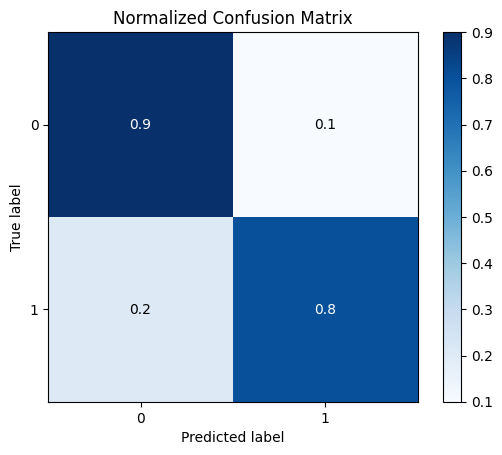

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=True)
plt.show()


In [ ]:
df['recording_id'].nunique()

132

##Metrics per 'question_id"

Classification Report for Q1:

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.80      1.00      0.89         4

    accuracy                           0.93        15
   macro avg       0.90      0.95      0.92        15
weighted avg       0.95      0.93      0.94        15



Classification Report for Q2:

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.00      0.00      0.00         1

    accuracy                           0.60        15
   macro avg       0.45      0.32      0.38        15
weighted avg       0.84      0.60      0.70        15



Classification Report for Q4:

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.00      0.00      0.00         1

    accuracy                           0.60        15
   macro avg       0.45      0.

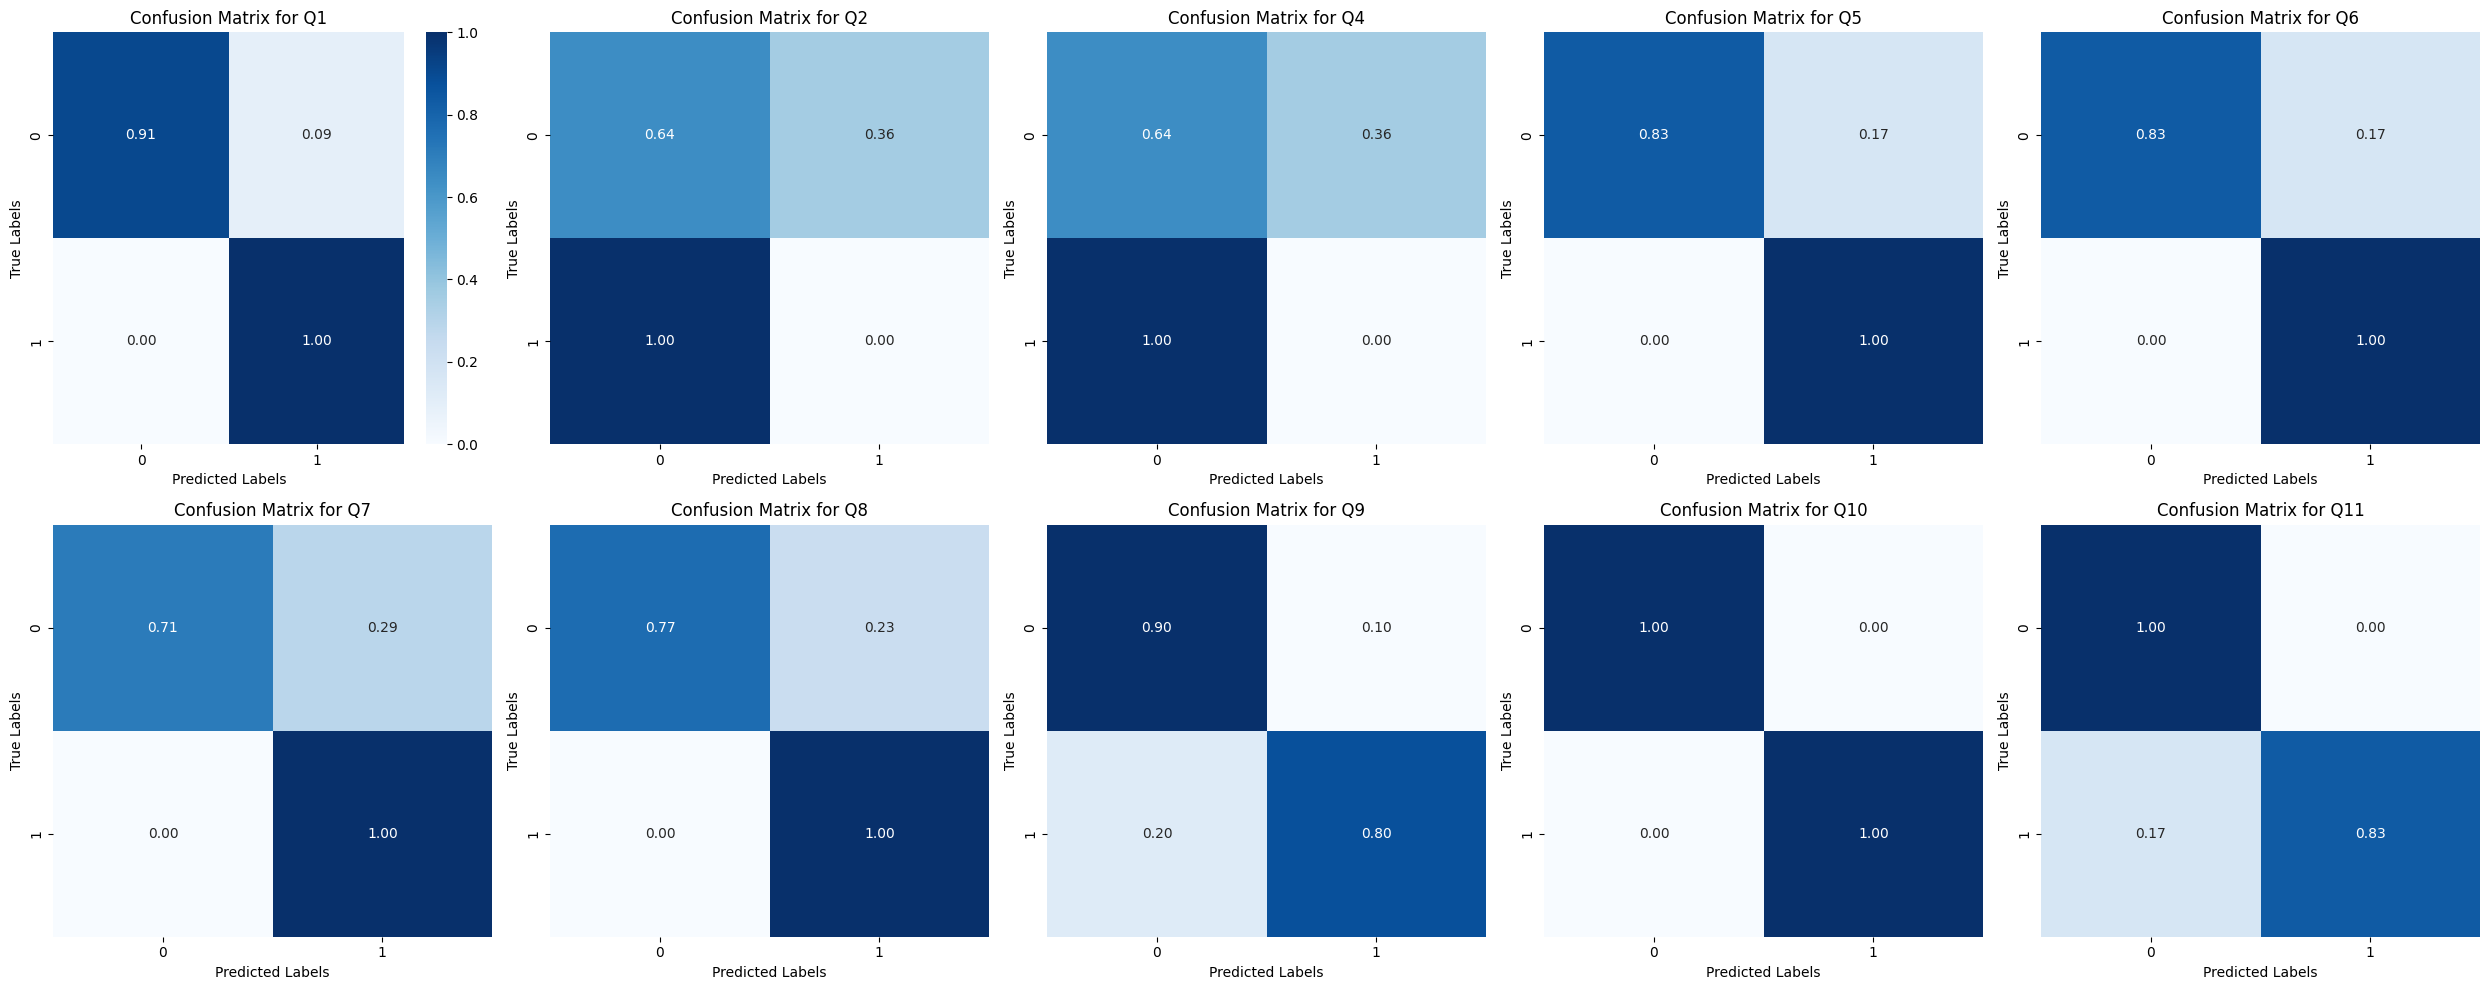

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the desired order of questions
question_order = ['Q1', 'Q2', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11']

# Print the classification reports in a readable format
for question_id in question_order:
    y_true = df[df['question_id'] == question_id]['ground_truth']
    y_pred = df[df['question_id'] == question_id]['class_absolute']
    print(f"Classification Report for {question_id}:\n")
    print(classification_report(y_true, y_pred))
    print("\n" + "="*60 + "\n")

# Plot confusion matrices per question_id in a single graph with 5 per row
num_questions = len(question_order)
fig, axes = plt.subplots(nrows=(num_questions + 4) // 5, ncols=5, figsize=(25, ((num_questions + 4) // 5) * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, question_id in enumerate(question_order):
    y_true = df[df['question_id'] == question_id]['ground_truth']
    y_pred = df[df['question_id'] == question_id]['class_absolute']

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, fmt='.2f', ax=axes[i], cmap='Blues', cbar=i == 0)
    axes[i].set_title(f"Confusion Matrix for {question_id}")
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
